<a href="https://colab.research.google.com/github/medyeneyke/Git_Test/blob/master/Copy_of_Exploring_the_Titanic_Dataset_Objective.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # Often used with Seaborn for customizations
import numpy as np # For estimator in barplot if needed, though mean is default

# --- Step 1: Load the Titanic Dataset ---
titanic_df = sns.load_dataset('titanic')

# --- Initial Data Cleaning/Preparation (Optional but good practice) ---
# For 'age', we can fill missing values with the median for some plots,
# or handle NaNs on a per-plot basis.
# For 'embarked' and 'embark_town', fill with the mode.
# For 'deck', it has too many missing values, often dropped or handled specially.

# Example: Fill missing 'age' with median for consistent use in some plots
# titanic_df['age'].fillna(titanic_df['age'].median(), inplace=True)
# Example: Fill missing 'embarked' and 'embark_town' with mode
# titanic_df['embarked'].fillna(titanic_df['embarked'].mode()[0], inplace=True)
# titanic_df['embark_town'].fillna(titanic_df['embark_town'].mode()[0], inplace=True)
# For this script, we will continue to handle NaNs per plot to show explicit handling.

print("--- Dataset Head ---")
print(titanic_df.head())
print("\n")


--- Dataset Head ---
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  




In [ ]:
# --- Step 2: Explore and Understand the Data ---
print("--- Dataset Info ---")
titanic_df.info()
print("\n")

print("--- Dataset Description (Numerical Features) ---")
print(titanic_df.describe())
print("\n")

print("--- Dataset Description (Categorical Features) ---")
print(titanic_df.describe(include=['object', 'category']))
print("\n")

print("--- Identifying Missing Values ---")
print(titanic_df.isnull().sum())
print("\n")

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


--- Dataset Description (Numerical Features) ---
       

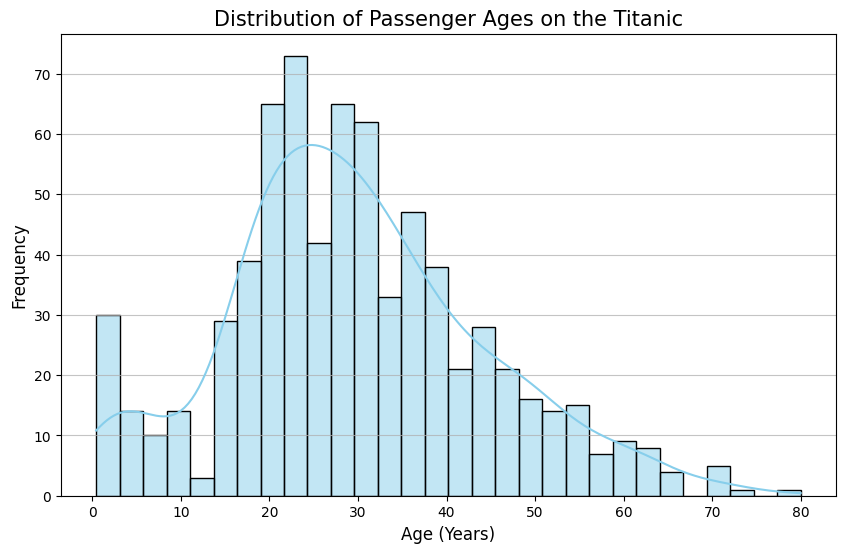

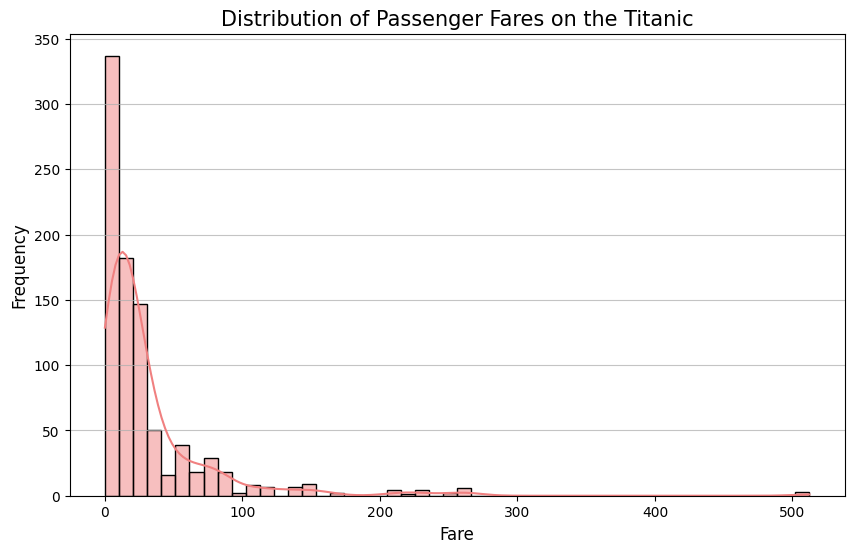

Successfully created distribution plots for Age and Fare.




In [ ]:
# --- Step 3: Create Visualizations ---

# --- 3a: Distribution Plot (Histogram + KDE) for Age ---
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['age'].dropna(), kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Passenger Ages on the Titanic', fontsize=15)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Distribution plot for 'Fare'
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['fare'], kde=True, bins=50, color='lightcoral', edgecolor='black')
plt.title('Distribution of Passenger Fares on the Titanic', fontsize=15)
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

print("Successfully created distribution plots for Age and Fare.")
print("\n")

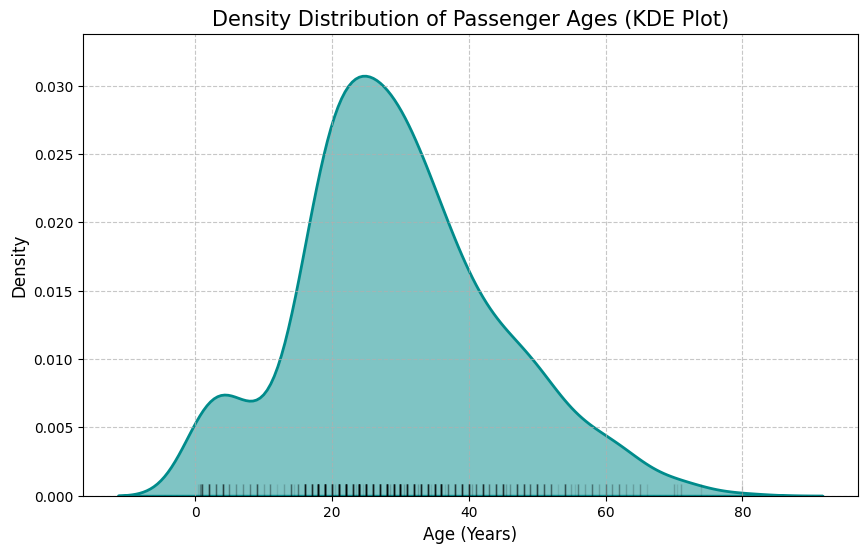

Successfully created a customized KDE plot for Age.




In [ ]:
# --- 3b: KDE Plot for Age ---
plt.figure(figsize=(10, 6))
sns.kdeplot(titanic_df['age'].dropna(), color='darkcyan', fill=True, alpha=0.5, linewidth=2)
sns.rugplot(titanic_df['age'].dropna(), color='black', alpha=0.1)
plt.title('Density Distribution of Passenger Ages (KDE Plot)', fontsize=15)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

print("Successfully created a customized KDE plot for Age.")
print("\n")

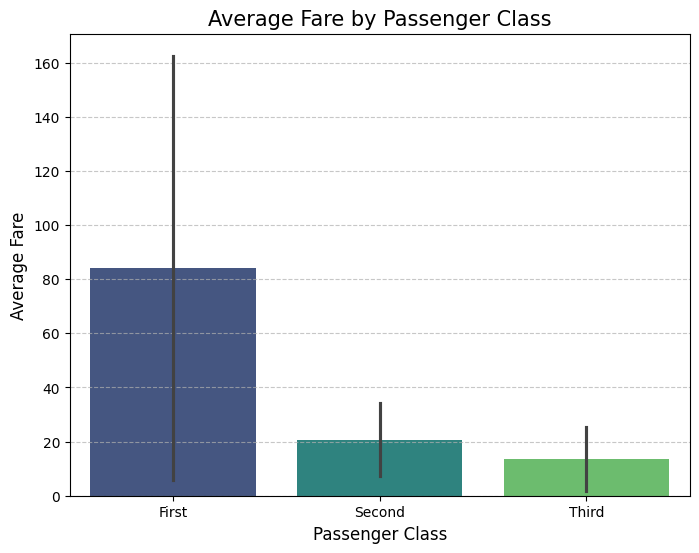

In [ ]:
# --- 3c: Bar Plot - Average Fare by Passenger Class ---
plt.figure(figsize=(8, 6))
sns.barplot(x='class', y='fare', data=titanic_df, palette='viridis', hue='class', dodge=False, errorbar='sd')
plt.title('Average Fare by Passenger Class', fontsize=15)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Average Fare', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['First', 'Second', 'Third'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

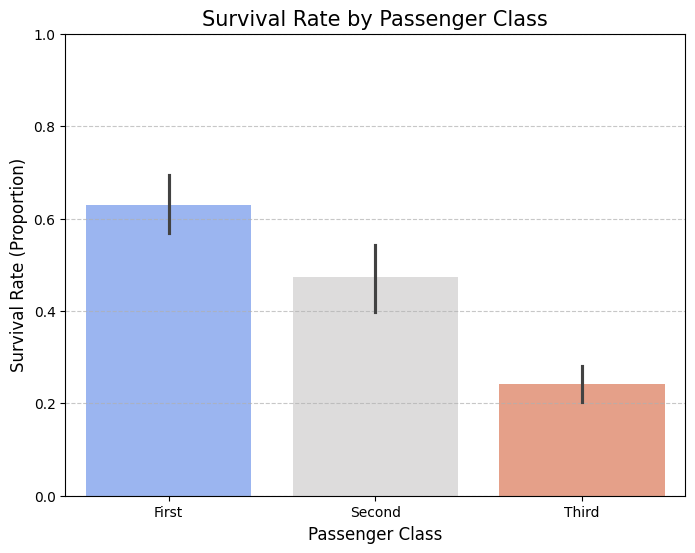

Successfully created bar plots for Average Fare and Survival Rate by Class.




In [ ]:
# Bar plot showing survival rate by class
plt.figure(figsize=(8,6))
sns.barplot(x='class', y='survived', data=titanic_df, palette='coolwarm', hue='class', dodge=False, errorbar=('ci', 95))
plt.title('Survival Rate by Passenger Class', fontsize=15)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Survival Rate (Proportion)', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['First', 'Second', 'Third'])
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Successfully created bar plots for Average Fare and Survival Rate by Class.")
print("\n")

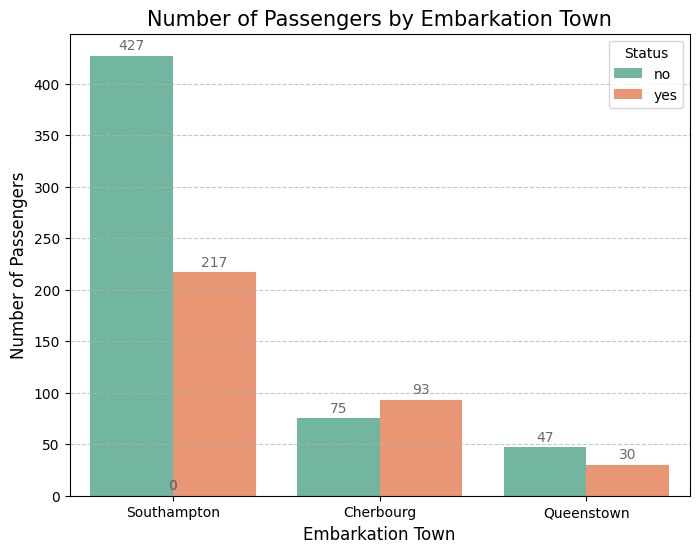

Successfully created a count plot for Passengers by Embarkation Town.




In [ ]:
# --- 3d: Count Plot - Passengers by Embarkation Town ---
# Purpose: To count and display the number of passengers who embarked from each town.
# This helps understand the passenger volume from different ports.
# 'embark_town' has a few missing values. sns.countplot handles NaNs by default
# or we can explicitly drop them or fill them.
# For countplot, it's often okay to let it show NaNs as a separate category if not filled.

plt.figure(figsize=(8, 6))
# sns.countplot() is used for showing the counts of observations in each categorical bin.
# We'll use 'embark_town'. The 'alive' column can be used for hue to add more information.
sns.countplot(x='embark_town', data=titanic_df, palette='Set2', hue='alive', order=titanic_df['embark_town'].value_counts().index)
# 'order' can be used to sort the bars, e.g., by frequency.
# 'hue' can be used to further categorize by another variable, like 'alive' or 'class'.

plt.title('Number of Passengers by Embarkation Town', fontsize=15)
plt.xlabel('Embarkation Town', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
# Annotate bars with counts for clarity
ax = plt.gca() # Get current axes
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height() + 3, f'{int(p.get_height())}',
            fontsize=10, color='dimgray', ha='center', va='bottom')
plt.legend(title='Status', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Insights from the Count Plot (Embarkation Town):
# - Shows which embarkation town had the most passengers (typically Southampton).
# - Using 'hue' (e.g., by 'alive' or 'class') can reveal further patterns,
#   such as survival rates or class distribution per town.
# - Missing values in 'embark_town' might appear as a separate category if not handled.

print("Successfully created a count plot for Passengers by Embarkation Town.")
print("\n")

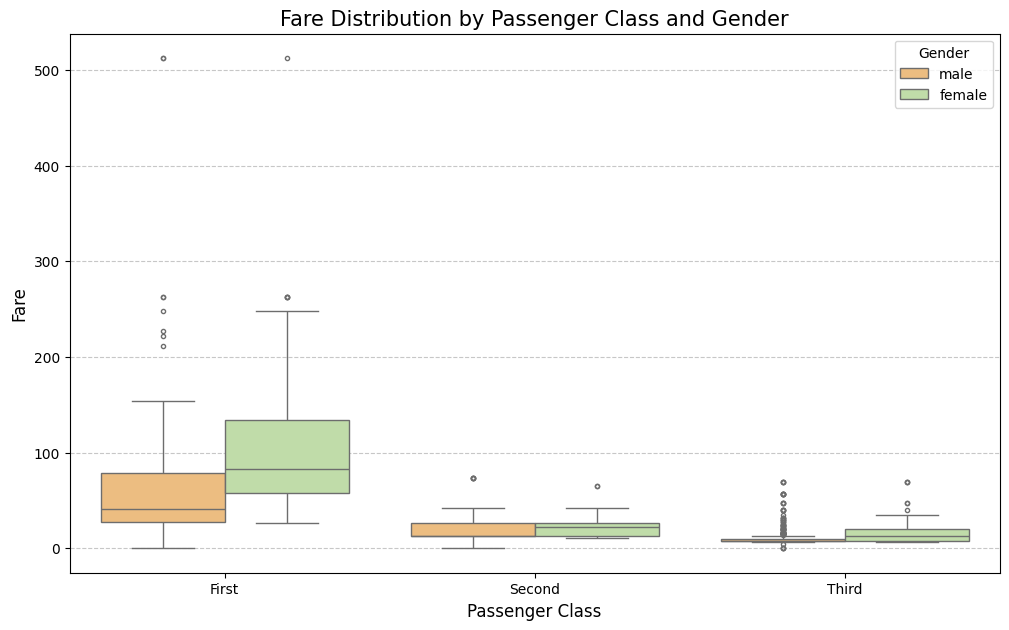

Successfully created a box plot for Fare Distribution by Class and Gender.




In [ ]:
# --- 3e: Box Plot - Fare Distribution by Class and Gender ---
# Purpose: To analyze the distribution of fares across different passenger classes,
# and further break it down by gender. Box plots are excellent for comparing distributions
# and identifying medians, quartiles, and outliers.

plt.figure(figsize=(12, 7))
sns.boxplot(x='class', y='fare', hue='sex', data=titanic_df, palette='Spectral', fliersize=3)
# 'fliersize' adjusts the size of outlier markers.
# 'hue' separates the data by 'sex' within each 'class'.

plt.title('Fare Distribution by Passenger Class and Gender', fontsize=15)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['First', 'Second', 'Third'])
# Y-axis can be skewed by very high fares, consider a log scale or ylim for better visualization if needed
# plt.yscale('log') # Uncomment to use a log scale for fare if distribution is too skewed
# plt.ylim(0, 300) # Uncomment to limit y-axis if outliers make plot hard to read
plt.legend(title='Gender', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Insights from the Box Plot (Fare by Class and Gender):
# - Clearly shows how fare distributions differ across classes (e.g., First class has higher and more spread-out fares).
# - Within each class, it compares fare distributions for males and females.
# - Outliers (passengers who paid exceptionally high or low fares for their group) are visible.
# - Differences in median fares and interquartile ranges (IQR) are easy to compare.

print("Successfully created a box plot for Fare Distribution by Class and Gender.")
print("\n")

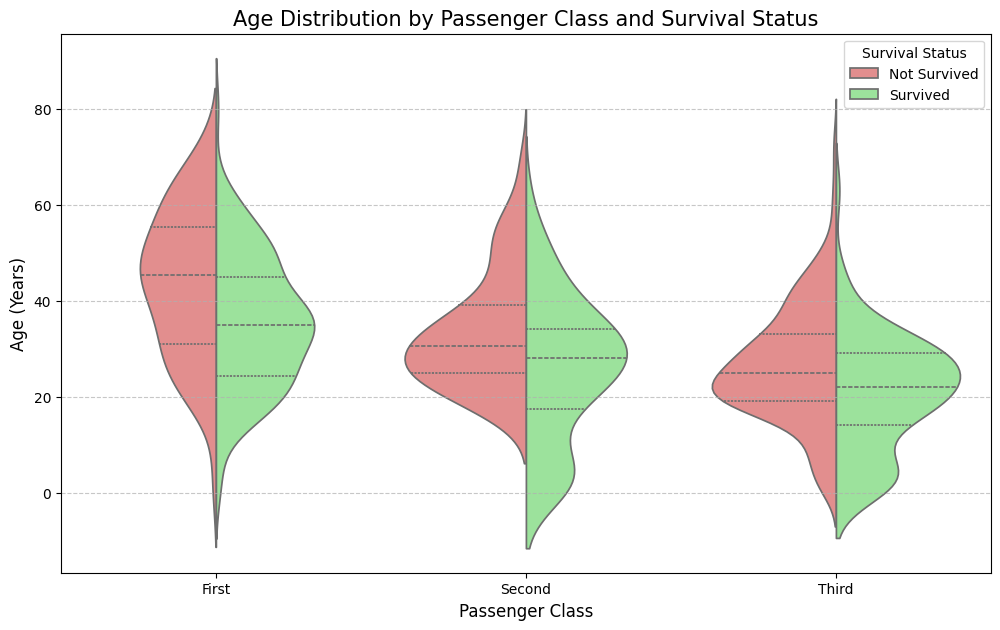

Successfully created a violin plot for Age Distribution by Class and Survival.




In [ ]:
# --- 3f: Violin Plot - Age Distribution by Passenger Class and Survival ---
# Purpose: To combine boxplot-like summaries with KDE (Kernel Density Estimate) to show
# the distribution of ages across passenger classes, further segmented by survival status.
# Violin plots are useful for visualizing the shape of the distribution in addition to summary statistics.

plt.figure(figsize=(12, 7))
# We use 'age'.dropna() for the data subset to avoid issues with missing age values.
sns.violinplot(x='class', y='age', hue='survived', data=titanic_df.dropna(subset=['age']),
               split=True, palette={0: "lightcoral", 1: "lightgreen"}, inner='quartile')
# 'split=True' allows for comparing two categories (e.g., survived vs. not survived) within the same violin.
# 'palette' customizes colors for survived (1) and not survived (0).
# 'inner="quartile"' shows the quartiles within the violin. Other options: 'box', 'stick', 'point'.

plt.title('Age Distribution by Passenger Class and Survival Status', fontsize=15)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Age (Years)', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['First', 'Second', 'Third'])
handles, labels = plt.gca().get_legend_handles_labels() # Get handles and labels
# Manually create legend labels for 0 and 1 if they are not descriptive
new_labels = ['Not Survived', 'Survived']
if len(labels) == 2 : # Basic check
    plt.legend(handles, new_labels, title='Survival Status', loc='upper right')
else:
    plt.legend(title='Survival Status', loc='upper right')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Insights from the Violin Plot (Age by Class and Survival):
# - Shows the age distribution shape for survivors and non-survivors within each class.
# - For example, one might observe if younger passengers in a certain class had higher survival.
# - The width of the violin indicates the density of passengers at a particular age.
# - 'split=True' makes comparisons more direct.

print("Successfully created a violin plot for Age Distribution by Class and Survival.")
print("\n")


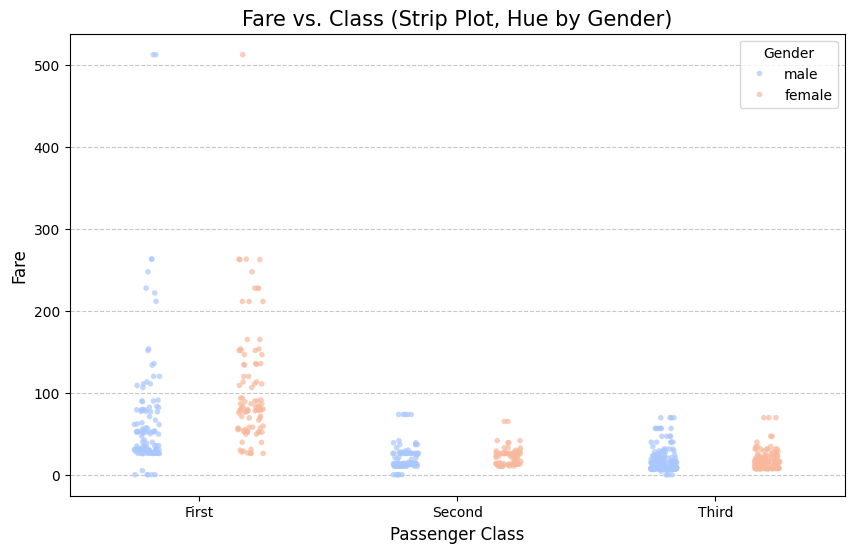

Successfully created a strip plot for Fare vs. Class, with Gender hue.




In [ ]:
# --- 3g: Strip Plot - Fare vs Class, Hue by Gender ---
# Purpose: To visualize the relationship between fare and class, with individual data points
# shown. Adding 'hue' for gender helps distinguish fare patterns between males and females
# within each class. Strip plots are useful for showing the underlying distribution of points.

plt.figure(figsize=(10, 6))
sns.stripplot(x='class', y='fare', hue='sex', data=titanic_df, palette='coolwarm', jitter=0.1, dodge=True, alpha=0.7, size=4)
# 'jitter=True' (or a small float value) adds random noise to prevent points from overlapping too much.
# 'dodge=True' separates the points for different hue levels along the categorical axis.
# 'alpha' for transparency, 'size' for marker size.

plt.title('Fare vs. Class (Strip Plot, Hue by Gender)', fontsize=15)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['First', 'Second', 'Third'])
# plt.ylim(0, 300) # Optional: zoom in if high fares make it hard to see details
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Insights from the Strip Plot:
# - Shows every passenger as a point, giving a sense of data density.
# - Highlights that First Class has a wider range of fares, including very high ones.
# - Differences in fare paid by males and females within each class can be observed.
# - Overlapping points can sometimes make interpretation difficult, which swarm plots address.

print("Successfully created a strip plot for Fare vs. Class, with Gender hue.")
print("\n")

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 57.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 59.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 14.6% of the points cannot be place

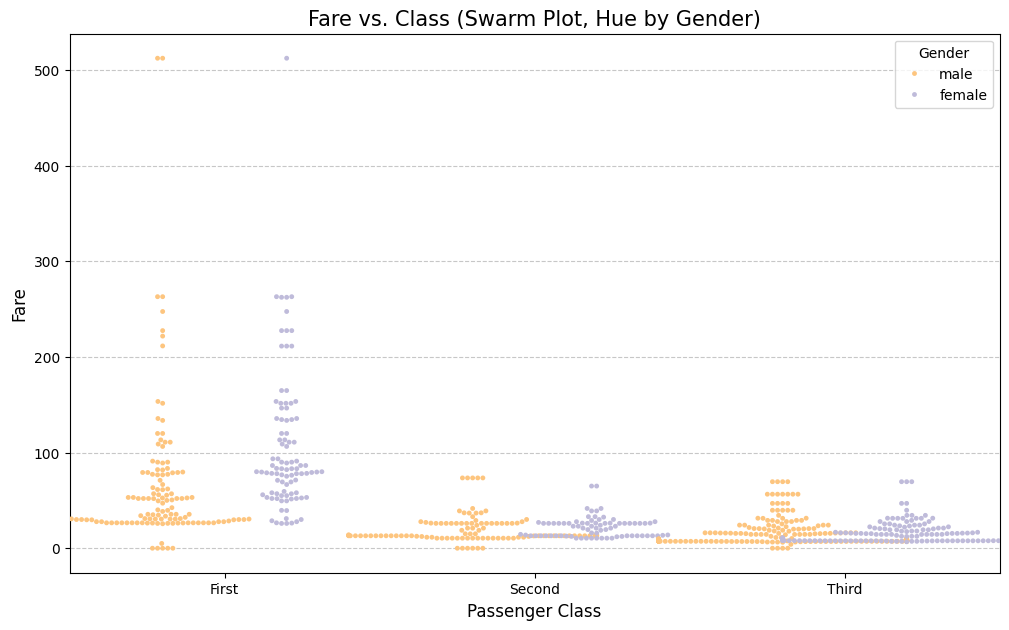

Successfully created a swarm plot for Fare vs. Class, with Gender hue.




In [ ]:
# --- 3h: Swarm Plot - Fare vs Class, Hue by Gender ---
# Purpose: To enhance the strip plot by arranging points so they don't overlap.
# This provides a clearer view of the distribution, especially in dense areas.
# Swarm plots can be computationally intensive for very large datasets.

plt.figure(figsize=(12, 7))
# For swarmplot, it's better to use a subset if data is very large, but Titanic is manageable.
# We might filter out extreme fare outliers for better visualization of the bulk of data.
# titanic_fare_filtered = titanic_df[titanic_df['fare'] < 300] # Example filter
sns.swarmplot(x='class', y='fare', hue='sex', data=titanic_df, palette='PuOr', dodge=True, size=3.5)
# 'dodge=True' is important when using 'hue' to separate swarms.
# 'size' adjusts marker size.

plt.title('Fare vs. Class (Swarm Plot, Hue by Gender)', fontsize=15)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['First', 'Second', 'Third'])
# plt.ylim(0, 300) # Optional: zoom in
plt.legend(title='Gender', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Insights from the Swarm Plot:
# - Similar insights to the strip plot but with better clarity due to non-overlapping points.
# - The shape of the distribution of fares within each class/gender combination is more apparent.
# - Can reveal density and clustering of data points more effectively.

print("Successfully created a swarm plot for Fare vs. Class, with Gender hue.")
print("\n")

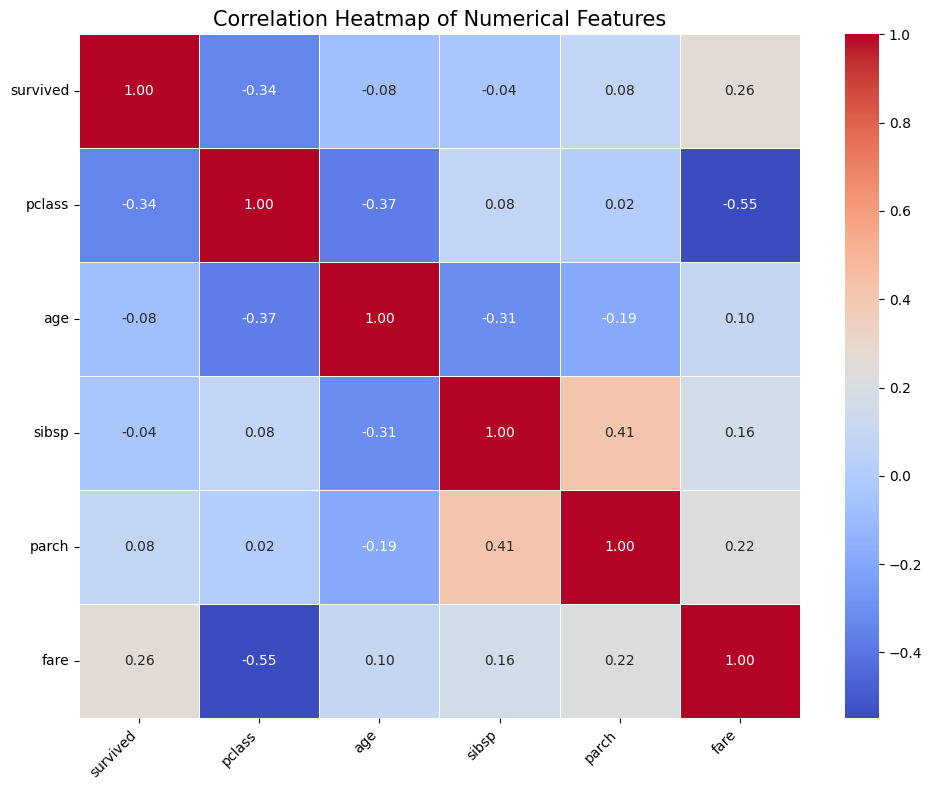

Successfully created a correlation heatmap.




In [ ]:
# --- 3i: Heatmap - Correlations between Numerical Features ---
# Purpose: To visualize the strength and direction of linear correlations between
# numerical features in the dataset.
# A heatmap provides a color-coded matrix of correlation coefficients.

# Select only numerical features for the correlation matrix
numerical_features = titanic_df.select_dtypes(include=np.number)
# We might want to drop columns that are identifiers or less relevant for general correlation,
# or those that are essentially categorical encoded as numbers if not careful (like 'survived', 'pclass' sometimes).
# For this exercise, we'll include 'survived' and 'pclass' as they are often analyzed.
# Drop columns with too many NaNs for correlation or that are less meaningful in this context
# For example, if 'age' had many NaNs, correlation might be affected.
# Here, .corr() handles pairwise NaNs by default.
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=True)
# 'annot=True' displays the correlation values on the heatmap.
# 'cmap' sets the color map (e.g., 'coolwarm', 'viridis', 'YlGnBu').
# 'fmt=".2f"' formats the annotation to two decimal places.
# 'linewidths' adds lines between cells.
# 'cbar' shows the color bar.

plt.title('Correlation Heatmap of Numerical Features', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Insights from the Heatmap:
# - Positive correlations (e.g., 'fare' and 'survived' might show a weak positive one,
#   'parch' and 'sibsp' might be correlated).
# - Negative correlations (e.g., 'pclass' and 'fare' are strongly negatively correlated;
#   'pclass' and 'survived' often show a negative correlation meaning higher class number (lower status) correlates with lower survival).
# - Helps identify multicollinearity if planning for regression models.
# - 'annot=True' makes it easy to read the exact correlation coefficients.

print("Successfully created a correlation heatmap.")
print("\n")

<Figure size 1200x1000 with 0 Axes>

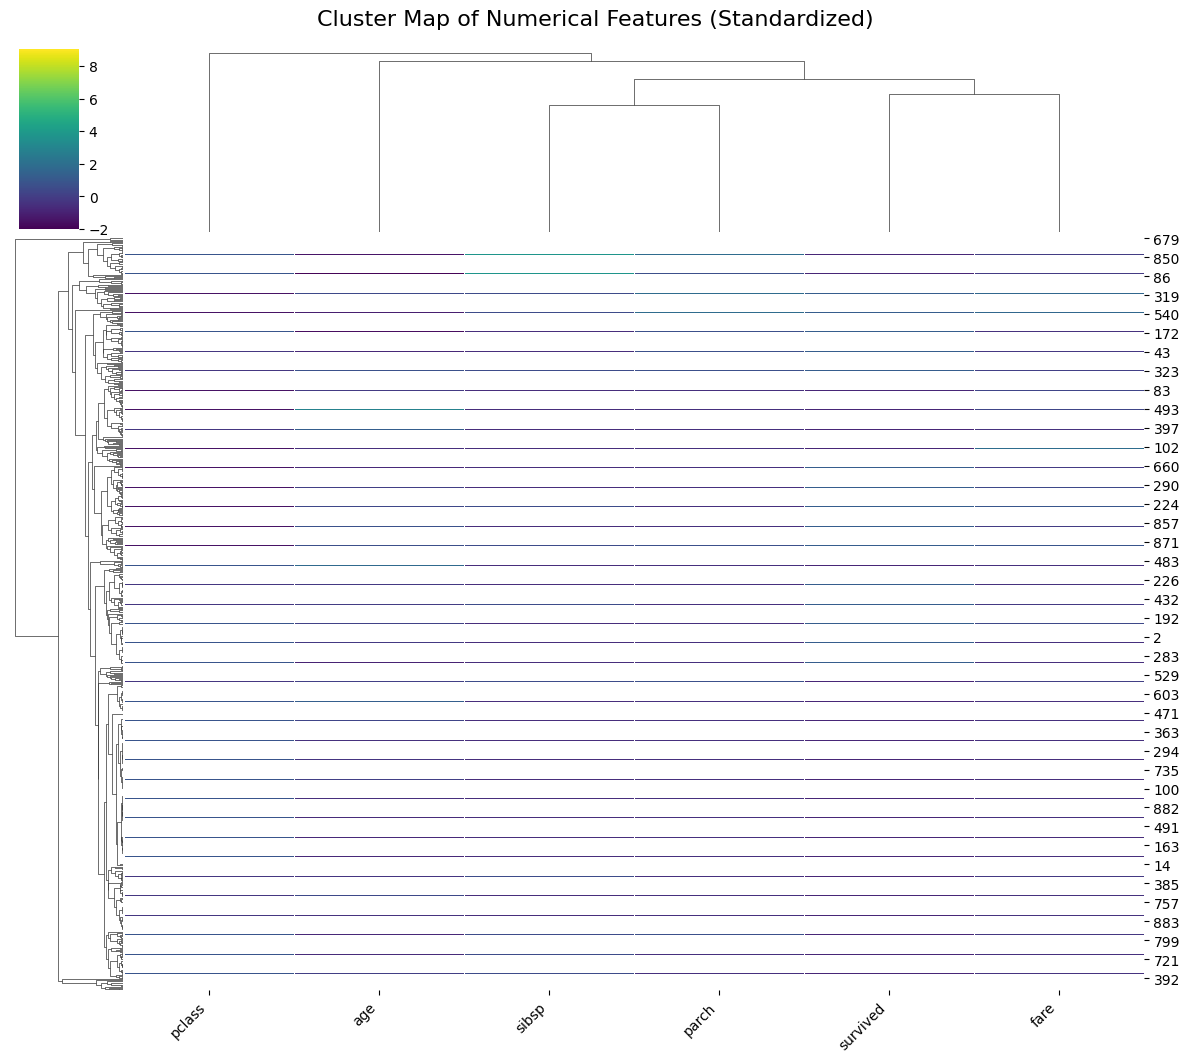

Successfully created a cluster map (if data was available).


--- All requested visualizations have been generated. ---
--- Review Step 4 (Customize Plots) and Step 5 (Present Work) ---
Customizations (palettes, annotations, styles) have been incorporated into each plot.
Explanations and insights are provided with each plot.


In [ ]:
# --- 3j: Cluster Map - Exploring Patterns in Numerical Data ---
# Purpose: To use hierarchical clustering to group similar rows and columns together
# in a heatmap. This can reveal underlying structures and patterns in the data
# that might not be apparent from a simple heatmap.

# Clustermap works best with data that doesn't have too many missing values.
# We'll use the numerical features, and drop rows with any NaNs for simplicity in this example.
# Alternatively, impute missing values.
numerical_df_for_clustermap = titanic_df.select_dtypes(include=np.number).dropna()

# Standardizing the data (Z-score normalization) is often recommended before clustering,
# as features with larger values can dominate the distance calculations.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_df_for_clustermap)
scaled_df = pd.DataFrame(scaled_data, columns=numerical_df_for_clustermap.columns, index=numerical_df_for_clustermap.index)


if not scaled_df.empty: # Proceed only if data is available after dropping NaNs
    plt.figure(figsize=(12, 10)) # figsize for clustermap is often better set directly in the call
    # Using the scaled data for the clustermap
    cluster_map = sns.clustermap(scaled_df, cmap='viridis', annot=False, fmt=".2f",
                                 linewidths=.5, figsize=(12,10), dendrogram_ratio=(.1, .2),
                                 cbar_pos=(0.02, 0.8, 0.05, 0.18)) # (left, bottom, width, height)
    # 'annot=False' because individual values in a large scaled matrix are less interpretable than clusters.
    # 'dendrogram_ratio' controls the size of the dendrograms.
    # 'cbar_pos' to position the colorbar if needed, or let seaborn decide.

    cluster_map.ax_heatmap.set_xticklabels(cluster_map.ax_heatmap.get_xticklabels(), rotation=45, ha='right')
    cluster_map.ax_heatmap.set_yticklabels(cluster_map.ax_heatmap.get_yticklabels(), rotation=0)
    plt.suptitle('Cluster Map of Numerical Features (Standardized)', fontsize=16, y=1.02) # y adjusts title position
    plt.show()

    # Insights from the Cluster Map:
    # - Shows how features and/or passengers (if rows are passengers) cluster together.
    # - Dendrograms on the rows and columns show the hierarchy of clusters.
    # - Can help identify groups of passengers with similar numerical profiles or features that behave similarly.
    # - For example, 'fare' and 'pclass' might cluster in opposition, while 'sibsp' and 'parch' might cluster together.
else:
    print("Skipping Clustermap as no data remained after dropping NaNs from numerical features.")


print("Successfully created a cluster map (if data was available).")
print("\n")

print("--- All requested visualizations have been generated. ---")
print("--- Review Step 4 (Customize Plots) and Step 5 (Present Work) ---")
print("Customizations (palettes, annotations, styles) have been incorporated into each plot.")
print("Explanations and insights are provided with each plot.")

